In [1]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [39]:
import importlib.util
spec = importlib.util.spec_from_file_location("text_pre_processing.py", "C:\\Users\\yilin.song\\Desktop\\sentiment-analysis\\Text_Pre_Processing_Package\\text_pre_processing\\text_pre_processing.py")
tp = importlib.util.module_from_spec(spec)
spec.loader.exec_module(tp)

In [3]:
preprocessor = tp.PreProcessor()

In [40]:
df = pd.read_csv('C:/Users/yilin.song/Desktop/sentiment-analysis/training.full.csv')

In [5]:
df.head()

,Sentiment,TwitterID,Date,QueryType,UserID,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


count    1.600000e+06
mean     1.317550e+01
std      6.957643e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      6.400000e+01
Name: TweetLength, dtype: float64

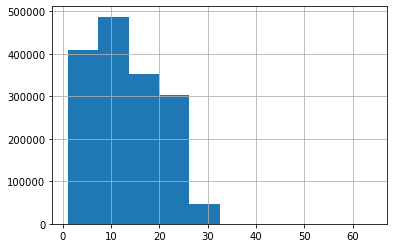

In [45]:
df['TweetLength'] = df['Tweet'].apply(lambda x: len(x.strip().split()))
df['TweetLength'].hist()
df['TweetLength'].describe()

(1600000, 7)


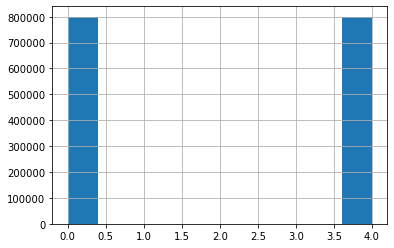

In [47]:
print(df.shape)
df['Sentiment'].hist()

In [18]:
x = np.array(df['TweetLength'])
np.percentile(x,[0.8,0.9,0.95,0.98])

array([2., 2., 2., 2.])

In [2]:
MODELS = {
    'CNN': None,
    'CNN_non_stopwords_10': None,
    'CnnLstm_non_stopwords_10': None,
    #'RNN': None,
}
# Model volting weights
WEIGHTS = [0.3, 0.2, 0.5]
for name in MODELS:
    path = "models/sentiment_model_{}.h5/1".format(name)
    MODELS[name] = tf.keras.models.load_model(path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
def get_eval_data():
    labels, features = [], []
    with open("../data/evaluation_non_stopwords/run-1583696665021-part-r-00000", "r", encoding = "utf-8") as f:
        for line in f:
            entry = json.loads(line)

            labels.append(int(entry["sentiment"]) / 4)
            features.append(list(map(lambda x: int(x), entry["feature"])))
    return features, labels

In [6]:
features, labels = get_eval_data()

In [7]:
def ensemble_predictions(models, input_data):
    # make predictions
    predictions = [models[m].predict(input_data) for m in models]
    
    probs = np.average(np.array(predictions), weights = WEIGHTS, axis = 0)
    
    results = list(map(lambda x: 1 if x[0] >= 0.5 else 0, probs))
    
    return np.array(results)

In [8]:
def model_evaluation(models, features, labels):
    #for m in models:
    #    print(f"Evaluating {m}:")
    #    models[m].evaluate(np.array(features), labels)
    print("Evaluating volting model, volting weights:")
    print('\n'.join([name + ': ' + str(w) for name, w in zip(models, WEIGHTS)]))
    predictions = ensemble_predictions(models, np.array(features))
    return np.mean([a == b for a, b in zip(predictions, labels)])

In [29]:
model_evaluation(MODELS, features, labels)

Evaluating volting model, volting weights:
CNN: 0.3
CNN_10: 0.2
CnnLstm_10: 0.5


0.7742625

In [9]:
rst = []
for i in range(10):
    for j in range(10-i):
        k = 10 - i - j
        WEIGHTS = [float(i)/10, float(j)/10, float(k)/10]
        acc = model_evaluation(MODELS, features, labels)
        print('Accuracy: ' + str(acc))
        rst.append([acc, WEIGHTS])
sorted(rst, key = lambda x: x[0])

Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.0
CnnLstm_non_stopwords_10: 1.0
Accuracy: 0.8262125
Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.1
CnnLstm_non_stopwords_10: 0.9
Accuracy: 0.827775
Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.2
CnnLstm_non_stopwords_10: 0.8
Accuracy: 0.8278125
Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.3
CnnLstm_non_stopwords_10: 0.7
Accuracy: 0.8274375
Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.4
CnnLstm_non_stopwords_10: 0.6
Accuracy: 0.8246125
Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.5
CnnLstm_non_stopwords_10: 0.5
Accuracy: 0.8160125
Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.6
CnnLstm_non_stopwords_10: 0.4
Accuracy: 0.809125
Evaluating volting model, volting weights:
CNN: 0.0
CNN_non_stopwords_10: 0.7
CnnLstm_non_stopwords_10: 0.

[[0.773275, [0.9, 0.0, 0.1]],
 [0.7827375, [0.8, 0.1, 0.1]],
 [0.785475, [0.8, 0.0, 0.2]],
 [0.7915625, [0.7, 0.2, 0.1]],
 [0.7953125, [0.7, 0.1, 0.2]],
 [0.7962625, [0.0, 0.9, 0.1]],
 [0.7974375, [0.1, 0.8, 0.1]],
 [0.7983, [0.7, 0.0, 0.3]],
 [0.7987875, [0.2, 0.7, 0.1]],
 [0.7994125, [0.3, 0.6, 0.1]],
 [0.799525, [0.0, 0.8, 0.2]],
 [0.799825, [0.6, 0.3, 0.1]],
 [0.8012125, [0.1, 0.7, 0.2]],
 [0.801425, [0.4, 0.5, 0.1]],
 [0.8029625, [0.5, 0.4, 0.1]],
 [0.8031375, [0.2, 0.6, 0.2]],
 [0.8037625, [0.0, 0.7, 0.3]],
 [0.8042375, [0.6, 0.2, 0.2]],
 [0.8053125, [0.3, 0.5, 0.2]],
 [0.80655, [0.1, 0.6, 0.3]],
 [0.8085375, [0.4, 0.4, 0.2]],
 [0.808675, [0.6, 0.1, 0.3]],
 [0.8090625, [0.2, 0.5, 0.3]],
 [0.809125, [0.0, 0.6, 0.4]],
 [0.8091375, [0.5, 0.3, 0.2]],
 [0.8110875, [0.6, 0.0, 0.4]],
 [0.81245, [0.1, 0.5, 0.4]],
 [0.8132, [0.5, 0.2, 0.3]],
 [0.8132625, [0.3, 0.4, 0.3]],
 [0.815075, [0.4, 0.3, 0.3]],
 [0.8160125, [0.0, 0.5, 0.5]],
 [0.817475, [0.2, 0.4, 0.4]],
 [0.817575, [0.5, 0.1, 0.4]

In [103]:
def keras_model_cnn():
    """
    Creating a CNN model for sentiment modeling

    """
    cnn_model = models.Sequential()
    cnn_model.add(
        layers.Embedding(
            input_length = 50,
            input_dim = 400002,
            output_dim = 50,
            trainable = True,
            name = 'embedding')
    )
    cnn_model.add(
        layers.Conv1D(
            filters = 100,
            kernel_size = 2,
            strides = 1,
            padding = 'valid',
            activation='relu')
    )
    cnn_model.add(
        layers.GlobalMaxPool1D()
    )
    cnn_model.add(
        layers.Dense(
            units = 100,
            activation='relu')
    )
    cnn_model.add(
        layers.Dense(
            units = 1,
            activation='sigmoid')
    )
    cnn_model.compile(
        optimizer='adam',
        loss=tf.keras.losses.binary_crossentropy,
        metrics=['accuracy'])
    return cnn_model

In [111]:
def keras_model_rnn():
    """
    Creating a RNN model for sentiment modeling

    """
    rnn_model = models.Sequential()
    rnn_model.add(
        layers.Embedding(
            input_length = 50,
            input_dim = 400002,
            output_dim = 50,
            trainable = True,
            name = 'embedding')
    )
    rnn_model.add(
        layers.SimpleRNN(
            100
        )
    )
    rnn_model.add(
        layers.Dense(
            units = 10,
            activation='relu')
    )
    rnn_model.add(
        layers.Dense(
            units = 1,
            activation='sigmoid')
    )
    rnn_model.compile(
        optimizer = 'adam',
        loss=tf.keras.losses.binary_crossentropy,
        metrics=['accuracy'])
    return rnn_model

In [112]:
def keras_model_CnnLstm():
    """
    Creating a LSTM model for sentiment modeling

    """
    model = models.Sequential()
    model.add(
        layers.Embedding(
            input_length = 50,
            input_dim = 400002,
            output_dim = 50,
            trainable = True,
            name = 'embedding')
    )
    model.add(
        layers.Dropout(0.25)
    )
    model.add(
        layers.Conv1D(
            64,
            5,
            padding='valid',
            activation='relu',
            strides=1)
    )
    model.add(
        layers.MaxPooling1D(
            pool_size=4)
    )
    model.add(
        layers.LSTM(64)
    )
    model.add(
        layers.Dense(1)
    )
    model.add(
        layers.Activation('sigmoid')
    )
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [113]:
CNN = keras_model_cnn()
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            20000100  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 49, 100)           10100     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 20,020,401
Trainable params: 20,020,401
Non-trainable params: 0
_________________________________________________________________


In [114]:
RNN = keras_model_rnn()
RNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            20000100  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               15100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 20,016,221
Trainable params: 20,016,221
Non-trainable params: 0
_________________________________________________________________


In [115]:
CNN_LSTM = keras_model_CnnLstm()
CNN_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            20000100  
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 46, 64)            16064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation (Activation)      (None, 1)                